# **Setup**

This configures the project environment and API key acquisition

In [1]:
# The only library that I did not have installed beforehand
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [6]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import requests

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Data Preprocessing**

Allows for the retrieval (a), cleaning (b), and stemming/lemming for each movie review (c)

**(a) Retrieve data. Display.**

In [7]:
api_key = "3da5ab67a88e4ed53c09e5b34dc05140"

movie_ids = [670292, 103, 149, 106646, 207703]
# Movie 1 = The Creator (a recent movie about AI) (670292)
# Movie 2 = Taxi Driver (103)
# Movie 3 = Akira (149)
# Movie 4 = The Wolf of Wall Street (106646)
# Movie 5 = Kingsman: The Secret Service (207703)

def get_single_movie_review(movie_id):
    base_url = "https://api.themoviedb.org/3/movie/"
    url = f"{base_url}{movie_id}/reviews?api_key={api_key}&language=en-US&page=1"
    response = requests.get(url)
    data = response.json()
    if data['results']:
        return data['results'][0]['content']
    else:
        return "There are no reviews for this movie."

first_reviews = []

for movie_id in movie_ids:
    review = get_single_movie_review(movie_id)
    first_reviews.append(review)

for i, review in enumerate(first_reviews):
    print(f"Review for Movie #{i + 1}:\n{review}")

Review for Movie #1:
I love it.

It's visually stunning. Not just the cinematography itself, but everything you see in the frame: the characters, the real locations, the visual effects (A.I. robots, simulants, the NOMAD, etc.).

The acting is great across the board – especially, especially by Ms. Madeleine Yuna Voyles. I have no idea how she did it. I was moved to my core. I have not been so rocked by an actor's performance since Mckenna Grace's performance in _Gifted_. Speaking of...

It's emotional and moving. And it's thought-provoking. This is one of those movies that sat with me afterwards.

And Hans Zimmer's score? Phenomenal.

Also, the sound design team did an amazing job as well. I thought the sound effects for the variety of fictional weapons, ships, etc. were visceral and natural and (I'm not sure the right words, but) unique and perfectly fitting.

I'm 100% sold on this movie. I was moved the first time I saw it, and even more so this time.
Review for Movie #2:
**Social out

**(b) Remove non-ASCII, stop words, punctuation, and emojis from the reviews.**

In [8]:
def clean_text(text):
    text = ''.join([char for char in text if char.isascii()])
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word.lower() not in stopwords.words('english')]
    return words

cleaned_reviews = [clean_text(review) for review in first_reviews]
for i, review in enumerate(cleaned_reviews):
    print(f"Cleaned review for Movie #{i + 1}:\n{review}")

Cleaned review for Movie #1:
['love', 'visually', 'stunning', 'cinematography', 'everything', 'see', 'frame', 'characters', 'real', 'locations', 'visual', 'effects', 'robots', 'simulants', 'nomad', 'acting', 'great', 'across', 'board', 'especially', 'especially', 'madeleine', 'yuna', 'voyles', 'idea', 'moved', 'core', 'rocked', 'actor', 'performance', 'since', 'mckenna', 'grace', 'performance', 'speaking', 'emotional', 'moving', 'one', 'movies', 'sat', 'afterwards', 'hans', 'zimmer', 'score', 'phenomenal', 'also', 'sound', 'design', 'team', 'amazing', 'job', 'well', 'thought', 'sound', 'effects', 'variety', 'fictional', 'weapons', 'ships', 'etc', 'visceral', 'natural', 'sure', 'right', 'words', 'unique', 'perfectly', 'fitting', '100', 'sold', 'movie', 'moved', 'first', 'time', 'saw', 'even', 'time']
Cleaned review for Movie #2:
['social', 'outcast', 'mohawk', 'goes', 'nutzoid', 'porn', 'obsessed', 'loner', 'travis', 'bickle', 'cabbie', 'new', 'york', 'story', 'tells', 'gradual', 'desce

**(c) Apply a stemming / lemmatization model to normalize the data for analysis.**

In [11]:
def apply_stemming(words):
    porter = PorterStemmer()
    stemmed_words = [porter.stem(word) for word in words]
    return stemmed_words

stemmed_reviews = [apply_stemming(words) for words in cleaned_reviews]
for i, review in enumerate(stemmed_reviews):
    print(f"Stemmed review for Movie #{i + 1}:\n{review}")

Stemmed review for Movie #1:
['love', 'visual', 'stun', 'cinematographi', 'everyth', 'see', 'frame', 'charact', 'real', 'locat', 'visual', 'effect', 'robot', 'simul', 'nomad', 'act', 'great', 'across', 'board', 'especi', 'especi', 'madelein', 'yuna', 'voyl', 'idea', 'move', 'core', 'rock', 'actor', 'perform', 'sinc', 'mckenna', 'grace', 'perform', 'speak', 'emot', 'move', 'one', 'movi', 'sat', 'afterward', 'han', 'zimmer', 'score', 'phenomen', 'also', 'sound', 'design', 'team', 'amaz', 'job', 'well', 'thought', 'sound', 'effect', 'varieti', 'fiction', 'weapon', 'ship', 'etc', 'viscer', 'natur', 'sure', 'right', 'word', 'uniqu', 'perfectli', 'fit', '100', 'sold', 'movi', 'move', 'first', 'time', 'saw', 'even', 'time']
Stemmed review for Movie #2:
['social', 'outcast', 'mohawk', 'goe', 'nutzoid', 'porn', 'obsess', 'loner', 'travi', 'bickl', 'cabbi', 'new', 'york', 'stori', 'tell', 'gradual', 'descent', 'mad', 'brought', 'inabl', 'relat', 'around', 'feel', 'lack', 'worth', 'travi', 'essen

# **Data Processing**

Allows for a word frequency counter which also plotted on a line graph (a), and a sentiment analysis (b & c) and visualization (using WordCloud) per review (d)

**(a) Frequency Counter:**

This counts the word frequencies and visualizes the top words in a plotted line graph (combines words found in all five reviews)

**(i) Run a frequency counter**

**(ii) Print the map of the frequency counter key value pairs. Display.**

**(iii) Plot the results (display)**

Frequency Counter Key-Value Pairs:
'love': 3
'visual': 2
'stun': 2
'cinematographi': 1
'everyth': 3
'see': 9
'frame': 2
'charact': 7
'real': 10
'locat': 1
'effect': 2
'robot': 1
'simul': 1
'nomad': 1
'act': 1
'great': 4
'across': 3
'board': 3
'especi': 2
'madelein': 1
'yuna': 1
'voyl': 1
'idea': 1
'move': 5
'core': 1
'rock': 1
'actor': 3
'perform': 4
'sinc': 8
'mckenna': 1
'grace': 1
'speak': 2
'emot': 1
'one': 15
'movi': 4
'sat': 1
'afterward': 1
'han': 1
'zimmer': 1
'score': 6
'phenomen': 1
'also': 9
'sound': 5
'design': 2
'team': 2
'amaz': 2
'job': 1
'well': 6
'thought': 1
'varieti': 1
'fiction': 1
'weapon': 1
'ship': 1
'etc': 1
'viscer': 1
'natur': 3
'sure': 1
'right': 5
'word': 2
'uniqu': 1
'perfectli': 1
'fit': 1
'100': 1
'sold': 1
'first': 7
'time': 13
'saw': 3
'even': 10
'social': 1
'outcast': 1
'mohawk': 1
'goe': 3
'nutzoid': 1
'porn': 1
'obsess': 1
'loner': 1
'travi': 2
'bickl': 1
'cabbi': 1
'new': 1
'york': 1
'stori': 4
'tell': 2
'gradual': 1
'descent': 1
'mad': 1
'brought':

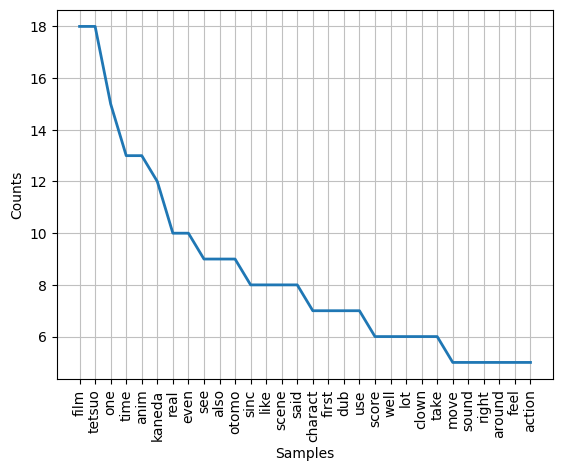

<Axes: xlabel='Samples', ylabel='Counts'>

In [12]:
def frequency_counter(words):
    frequency = FreqDist(words)
    return frequency

all_words = [word for review in stemmed_reviews for word in review]

freq_counter = frequency_counter(all_words)

print("Frequency Counter Key-Value Pairs:")
for word, count in freq_counter.items():
    print(f"'{word}': {count}")

freq_counter.plot(30)

**(b) Use TextBlob to determine and report review sentiment subjectivity**

In [13]:
def analyze_subjectivity(text):
    blob = TextBlob(text)
    subjectivity = blob.sentiment.subjectivity
    return subjectivity

subjectivities = [analyze_subjectivity(' '.join(words)) for words in stemmed_reviews]
for i, subjectivity in enumerate(subjectivities):
    print(f"Subjectivity for Movie #{i + 1}: {subjectivity}")

Subjectivity for Movie #1: 0.4189033189033189
Subjectivity for Movie #2: 0.48658008658008656
Subjectivity for Movie #3: 0.438179413179413
Subjectivity for Movie #4: 0.4314880952380952
Subjectivity for Movie #5: 0.425


**(c) Use Vader to determine and report review sentiment via polarity scores.**

In [14]:
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment

vader_sentiments = [analyze_sentiment_vader(' '.join(words)) for words in stemmed_reviews]
for i, vader_sentiment in enumerate(vader_sentiments):
    print(f"Vader Sentiment for Movie #{i + 1}: {vader_sentiment}")

Vader Sentiment for Movie #1: {'neg': 0.024, 'neu': 0.776, 'pos': 0.2, 'compound': 0.9413}
Vader Sentiment for Movie #2: {'neg': 0.216, 'neu': 0.672, 'pos': 0.112, 'compound': -0.7906}
Vader Sentiment for Movie #3: {'neg': 0.092, 'neu': 0.759, 'pos': 0.148, 'compound': 0.9962}
Vader Sentiment for Movie #4: {'neg': 0.103, 'neu': 0.764, 'pos': 0.133, 'compound': 0.6749}
Vader Sentiment for Movie #5: {'neg': 0.0, 'neu': 0.342, 'pos': 0.658, 'compound': 0.9371}


**(d) Visualization - WordCloud**

This creates and displays word clouds for each review

**(i) Display a word cloud for each review :**

Word Cloud for Movie #1 Review:


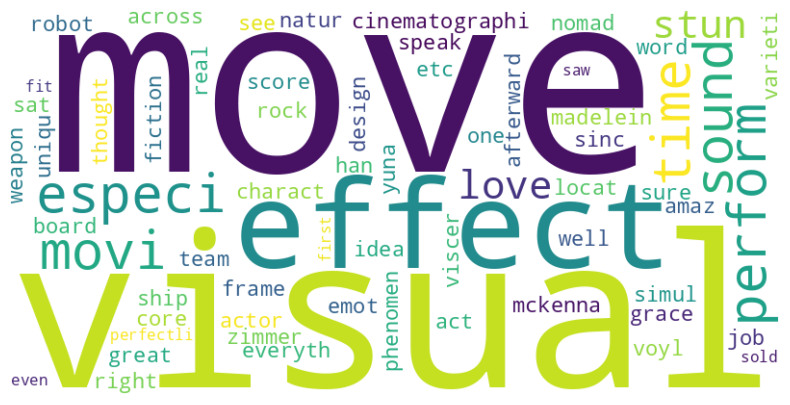

Word Cloud for Movie #2 Review:


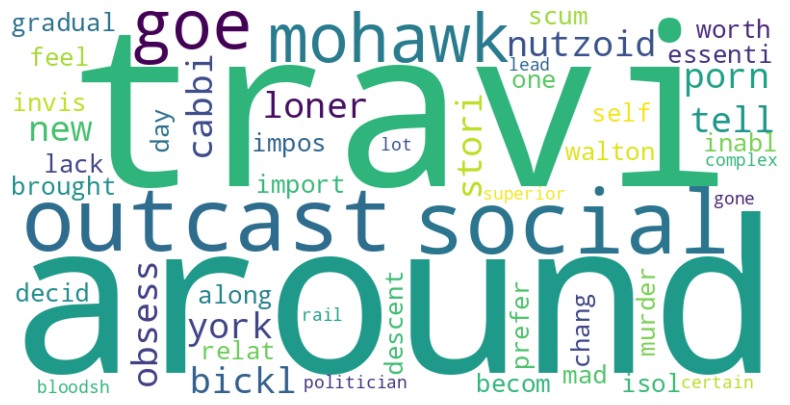

Word Cloud for Movie #3 Review:


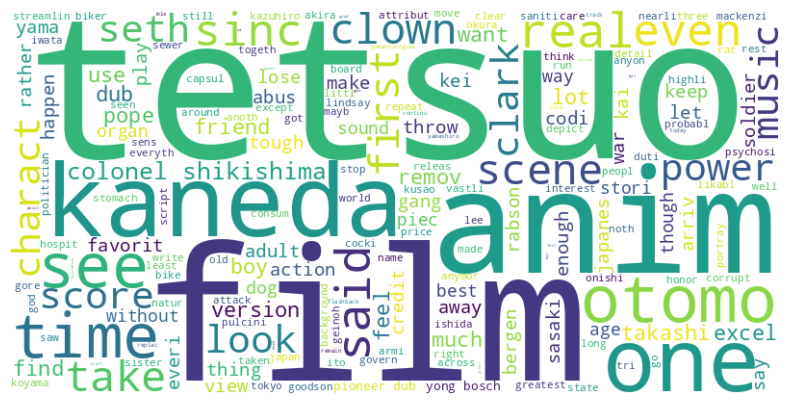

Word Cloud for Movie #4 Review:


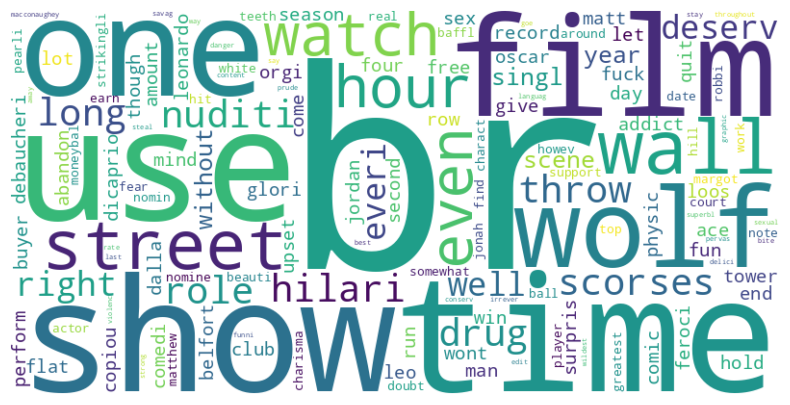

Word Cloud for Movie #5 Review:


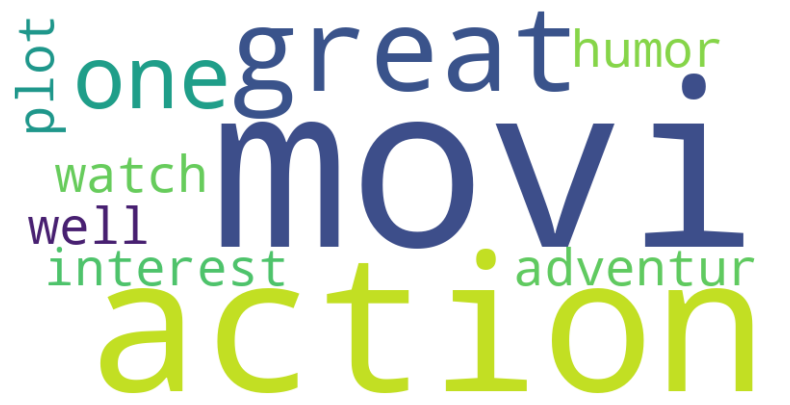

In [15]:
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

for i, review in enumerate(stemmed_reviews):
    print(f"Word Cloud for Movie #{i + 1} Review:")
    generate_word_cloud(' '.join(review))

**(e) NER**

This identifies and displays named entities in each review

**(i) Display the named entities in each review**

In [16]:
def extract_named_entities(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    named_entities = [word for word, tag in tagged_words if tag == 'NNP']
    return named_entities

for i, review in enumerate(first_reviews):
    named_entities = extract_named_entities(review)
    print(f"Named Entities in Movie #{i + 1} Review:")
    for entity in named_entities:
        print(entity)

Named Entities in Movie #1 Review:
A.I
NOMAD
–
Ms.
Madeleine
Yuna
Voyles
Mckenna
Grace
_Gifted_
Zimmer
Phenomenal
Named Entities in Movie #2 Review:
*
Social
*
*
Porn
Travis
Bickle
New
York
Travis
Walton
Named Entities in Movie #3 Review:
Katsuhiro
Otomo
Otomo
God
gang
_the_
July
Tokyo
World
War
III
Tokyo
Neo-Tokyo
Shotaro
Kaneda
Cam
Clarke
Streamline
Johnny
Yong
Bosch
Pioneer
Mitsuo
Iwata
Japanese
Capsules
Clowns
Kaneda
Tetsuo
Shima
Jan
Rabson
Joshua
Seth
Nozomu
Sasaki
Kai
Bob
Bergen
Anthony
Pulcini
Takeshi
Kusao
Yama
Tony
Pope
Michael
Lindsay
Masaaki
Okura
Clowns
Takashi
Barbara
Goodson
Cody
Mackenzie
Tatsuhiko
Nakamura
Tetsuo
Clown
Takashi
Tetsuo
Colonel
Shikishima
Pope
Jamieson
Price
Taro
Ishida
Tetsuo
Takashi
Kaneda
Kei
Lara
Cody
Wendee
Lee
Mami
Koyama
Dr.
Onishi
Lewis
Arquette
Simon
Prescott
Mizuho
Suzuki
Tetsuo
Tetsuo
Kaneda
Kaori
Goodson
Michelle
Ruff
Yuriko
Fuchizaki
Clowns
Tetsuo
Clown
Kiyoko
Melora
Harte
Sandy
Fox
Fukue
Ito
Sachie
Ito
Takashi
Masaru
Bergen
Mackenzie
Kazuhiro